In [180]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from utils import autoparse_year

In [181]:
df_edges = pd.read_pickle('../data/generated/graph/actor_graph_full.grouped.pkl')
df_actors = pd.read_pickle('../data/generated/preprocessed/characters.pkl')
df_actors

,wiki_id,fb_movie_id,release,character_name,actor_age,fb_char_id,fb_actor_id,actor_name,actor_birth,ethnicity,actor_height,actor_gender,actor_nationality
0,975900,/m/03vyhn,2001-08-24,Akooshay,42.0,/m/0bgchxw,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America
1,24767455,/m/0809s7n,2009-10-16,Captain Diaz,51.0,/m/08d9z0b,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America
2,5337169,/m/0dg7mt,2001,NaN,42.0,/m/04htxdc,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America
3,1330220,/m/04t8wq,1990-06-22,NaN,31.0,/m/0cg7kl2,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America
4,14686017,/m/03gt21w,1990-01-12,NaN,31.0,/m/09j0r8t,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Additional Voices,38.0,/m/0kr405f,/m/0gn4bz,Sonny Byrkett,1954,NaN,NaN,M,NaN
450665,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,38.0,/m/0kr407w,/m/0gn4bz,Sonny Byrkett,1954,NaN,NaN,M,NaN
450666,913762,/m/03pcrp,1992-05-21,Silvie Gena,34.0,/m/0kr40b9,/m/0gn4nd,Susan Byrkett,1958,NaN,NaN,F,NaN
450667,913762,/m/03pcrp,1992-05-21,Exegran,NaN,/m/0kr407c,/m/0kr407h,Hal Cleaveland,NaN,NaN,NaN,M,NaN


In [182]:
df_edges

,actor1_fbid,actor2_fbid,movie_count
503641,/m/02cvp8,/m/02t0n9,219
503751,/m/02cvp8,/m/045g4l,119
655469,/m/02t0n9,/m/045g4l,119
906958,/m/03mv0b,/m/0lh0c,101
503672,/m/02cvp8,/m/030dx5,82
...,...,...,...
717944,/m/02z28y7,/m/09t0l3,1
717943,/m/02z28y7,/m/09rxk8z,1
717942,/m/02z28y7,/m/09rvxt5,1
717941,/m/02z28y7,/m/09q3gc,1


In [183]:
x=df_edges.rename(columns={"actor2_fbid": "actor1_fbid","actor1_fbid": "actor2_fbid"})
df_edges= pd.concat([df_edges, x])

In [184]:
df_actors['year_of_birth'] = df_actors.actor_birth.apply(autoparse_year).astype('Int64')
df_actors=df_actors.rename(columns={"fb_actor_id": "actor1_fbid"})
df_actors

,wiki_id,fb_movie_id,release,character_name,actor_age,fb_char_id,actor1_fbid,actor_name,actor_birth,ethnicity,actor_height,actor_gender,actor_nationality,year_of_birth
0,975900,/m/03vyhn,2001-08-24,Akooshay,42.0,/m/0bgchxw,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America,1958
1,24767455,/m/0809s7n,2009-10-16,Captain Diaz,51.0,/m/08d9z0b,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America,1958
2,5337169,/m/0dg7mt,2001,NaN,42.0,/m/04htxdc,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America,1958
3,1330220,/m/04t8wq,1990-06-22,NaN,31.0,/m/0cg7kl2,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America,1958
4,14686017,/m/03gt21w,1990-01-12,NaN,31.0,/m/09j0r8t,/m/03wcfv7,Wanda De Jesus,1958-08-26,NaN,1.62,F,United States of America,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Additional Voices,38.0,/m/0kr405f,/m/0gn4bz,Sonny Byrkett,1954,NaN,NaN,M,NaN,1954
450665,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,38.0,/m/0kr407w,/m/0gn4bz,Sonny Byrkett,1954,NaN,NaN,M,NaN,1954
450666,913762,/m/03pcrp,1992-05-21,Silvie Gena,34.0,/m/0kr40b9,/m/0gn4nd,Susan Byrkett,1958,NaN,NaN,F,NaN,1958
450667,913762,/m/03pcrp,1992-05-21,Exegran,NaN,/m/0kr407c,/m/0kr407h,Hal Cleaveland,NaN,NaN,NaN,M,NaN,<NA>


In [185]:
df_actors_reduced= df_actors.drop_duplicates(subset= 'actor1_fbid')
df_actors_reduced= df_actors_reduced.drop(['wiki_id','fb_movie_id','release','character_name','fb_char_id','actor_birth'], axis=1)
df_actors_reduced

,actor_age,actor1_fbid,actor_name,ethnicity,actor_height,actor_gender,actor_nationality,year_of_birth
0,42.0,/m/03wcfv7,Wanda De Jesus,NaN,1.620,F,United States of America,1958
8,27.0,/m/0346l4,Natasha Henstridge,NaN,1.780,F,Canada,1974
31,32.0,/m/01vw26l,Ice Cube,NaN,1.727,M,United States of America,1969
64,33.0,/m/034hyc,Jason Statham,NaN,1.750,M,United Kingdom,1967
95,23.0,/m/01y9xg,Clea DuVall,NaN,1.650,F,United States of America,1977
...,...,...,...,...,...,...,...,...
450663,NaN,/m/0kr409z,Violet Bronte,NaN,NaN,F,NaN,<NA>
450664,38.0,/m/0gn4bz,Sonny Byrkett,NaN,NaN,M,NaN,1954
450666,34.0,/m/0gn4nd,Susan Byrkett,NaN,NaN,F,NaN,1958
450667,NaN,/m/0kr407h,Hal Cleaveland,NaN,NaN,M,NaN,<NA>


In [186]:
df_actors_reduced= pd.merge(df_actors_reduced, (df_actors.groupby('actor1_fbid').apply(lambda x: pd.Series({
        'number_of_movies': x['wiki_id'].count()
    }))),on='actor1_fbid')

In [187]:
df_actors_reduced

,actor_age,actor1_fbid,actor_name,ethnicity,actor_height,actor_gender,actor_nationality,year_of_birth,number_of_movies
0,42.0,/m/03wcfv7,Wanda De Jesus,NaN,1.620,F,United States of America,1958,8
1,27.0,/m/0346l4,Natasha Henstridge,NaN,1.780,F,Canada,1974,23
2,32.0,/m/01vw26l,Ice Cube,NaN,1.727,M,United States of America,1969,33
3,33.0,/m/034hyc,Jason Statham,NaN,1.750,M,United Kingdom,1967,31
4,23.0,/m/01y9xg,Clea DuVall,NaN,1.650,F,United States of America,1977,31
...,...,...,...,...,...,...,...,...,...
135755,NaN,/m/0kr409z,Violet Bronte,NaN,NaN,F,NaN,<NA>,1
135756,38.0,/m/0gn4bz,Sonny Byrkett,NaN,NaN,M,NaN,1954,2
135757,34.0,/m/0gn4nd,Susan Byrkett,NaN,NaN,F,NaN,1958,1
135758,NaN,/m/0kr407h,Hal Cleaveland,NaN,NaN,M,NaN,<NA>,1


In [188]:
x=df_edges.merge(df_actors_reduced, on='actor1_fbid')
df_actors_reduced=df_actors_reduced.rename(columns={"actor1_fbid": "actor2_fbid"})
df_edges= x.merge(df_actors_reduced, on='actor2_fbid')


In [189]:
homophily = {}

In [190]:
edges_age=df_edges.dropna(subset=['actor_age_x'])
edges_age= edges_age.dropna(subset=['actor_age_y'])
edges_age['same_age'] = edges_age.apply(lambda x: 1 if (abs(x.actor_age_x-x.actor_age_y) < 5) else (-1), axis= 1)
edges_age

,actor1_fbid,actor2_fbid,movie_count,actor_age_x,actor_name_x,ethnicity_x,actor_height_x,actor_gender_x,actor_nationality_x,year_of_birth_x,number_of_movies_x,actor_age_y,actor_name_y,ethnicity_y,actor_height_y,actor_gender_y,actor_nationality_y,year_of_birth_y,number_of_movies_y,same_age
9,/m/02x7d3n,/m/02t0n9,26,40.0,Cy Schindell,NaN,NaN,M,United States of America,1907,29,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
11,/m/09gx1x,/m/02t0n9,40,43.0,Emil Sitka,NaN,NaN,M,United States of America,1914,45,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
15,/m/045g4l,/m/02t0n9,119,38.0,Curly Howard,NaN,NaN,M,United States of America,1903,120,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
20,/m/03cv7x1,/m/02t0n9,13,35.0,Dick Curtis,NaN,1.90,M,United States of America,1902,21,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
21,/m/01mv_n,/m/02t0n9,1,60.0,Paul Winchell,NaN,NaN,M,United States of America,1922,16,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160568,/m/02q5y6b,/m/02q2894,1,30.0,Jay Revelle,NaN,1.75,M,NaN,1976,1,33.0,Clement Lush,NaN,1.8288,M,NaN,1973,1,1
4160569,/m/0g8nhwk,/m/02pxpmk,1,28.0,Gregor Torzs,NaN,NaN,M,Germany,1970,1,24.0,Miriam Lahnstein,NaN,NaN,F,Germany,1974,1,1
4160570,/m/03wcshk,/m/03436f,1,42.0,Gianni Raimondi,NaN,NaN,M,NaN,1923,1,30.0,Mirella Freni,NaN,NaN,F,NaN,1935,1,-1
4160575,/m/09n13f,/m/03c757g,1,32.0,Dick Wagner,NaN,NaN,M,NaN,1943,1,27.0,Steve Hunter,NaN,NaN,M,NaN,1948,1,-1


In [191]:
age_homophily = edges_age.groupby('actor1_fbid')['same_age'].agg(['mean'])
print('mean =',age_homophily.mean(), 'and std =', age_homophily.std())
homophily['age']= {
		'mean': age_homophily.mean(),
		'std': age_homophily.std()
	}

mean = mean   -0.538211
dtype: float64 and std = mean    0.372281
dtype: float64


In [192]:
edges_height=df_edges.dropna(subset=['actor_height_x'])
edges_height= edges_height.dropna(subset=['actor_height_y'])
edges_height['same_height'] = edges_height.apply(lambda x: 1 if (abs(x.actor_height_x-x.actor_height_y) < 0.05) else (-1), axis= 1)
edges_height

,actor1_fbid,actor2_fbid,movie_count,actor_age_x,actor_name_x,ethnicity_x,actor_height_x,actor_gender_x,actor_nationality_x,year_of_birth_x,number_of_movies_x,actor_age_y,actor_name_y,ethnicity_y,actor_height_y,actor_gender_y,actor_nationality_y,year_of_birth_y,number_of_movies_y,same_height
0,/m/02cvp8,/m/02t0n9,219,NaN,Moe Howard,NaN,1.620,M,United States of America,1897,225,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
3,/m/030dx5,/m/02t0n9,82,NaN,Samuel Howard,NaN,1.651,M,United States of America,1895,97,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
8,/m/02z475f,/m/02t0n9,24,NaN,Al Thompson,NaN,1.700,M,United States of America,1884,25,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
17,/m/03mdp_b,/m/02t0n9,11,NaN,Lynton Brent,NaN,1.770,M,United States of America,1897,21,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
20,/m/03cv7x1,/m/02t0n9,13,35.0,Dick Curtis,NaN,1.900,M,United States of America,1902,21,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160317,/m/076wpzj,/m/02pj1mn,1,20.0,Lemon Hanazawa,Japanese people,1.590,F,NaN,1984,5,34.0,Maki Tomoda,Japanese people,1.6400,F,NaN,1972,2,1
4160341,/m/06g_vy,/m/056wrw2,1,36.0,Stephanie Swift,French Americans,1.550,F,United States of America,1972,2,28.0,Ariel X,NaN,1.6000,F,NaN,1980,1,-1
4160343,/m/0bh93c1,/m/058f6y0,1,NaN,Jade Starr,NaN,1.650,F,United States of America,1981,1,NaN,Jayme Langford,NaN,1.6000,F,United States of America,1987,1,1
4160507,/m/02r672s,/m/026jg50,1,36.0,Zeb Atlas,NaN,1.905,M,United States of America,1970,1,26.0,Mark Dalton,NaN,1.7780,M,United States of America,1980,1,-1


In [193]:
height_homophily = edges_height.groupby('actor1_fbid')['same_height'].agg(['mean'])
print('mean =',height_homophily.mean(), 'and std =', height_homophily.std())
homophily['height']= {
		'mean': height_homophily.mean(),
		'std': height_homophily.std()
	}

mean = mean   -0.497523
dtype: float64 and std = mean    0.337017
dtype: float64


In [194]:
edges_gender=df_edges.dropna(subset=['actor_gender_x'])
edges_gender= edges_gender.dropna(subset=['actor_gender_y'])
edges_gender['same_gender'] = edges_gender.apply(lambda x: 1 if (x.actor_gender_x == x.actor_gender_y) else (-1), axis= 1)
edges_gender

,actor1_fbid,actor2_fbid,movie_count,actor_age_x,actor_name_x,ethnicity_x,actor_height_x,actor_gender_x,actor_nationality_x,year_of_birth_x,number_of_movies_x,actor_age_y,actor_name_y,ethnicity_y,actor_height_y,actor_gender_y,actor_nationality_y,year_of_birth_y,number_of_movies_y,same_gender
0,/m/02cvp8,/m/02t0n9,219,NaN,Moe Howard,NaN,1.6200,M,United States of America,1897,225,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
1,/m/026xmsr,/m/02t0n9,72,NaN,Vernon Dent,NaN,NaN,M,United States of America,1895,80,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
2,/m/02z023s,/m/02t0n9,40,NaN,Bud Jamison,NaN,NaN,M,United States of America,1894,58,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
3,/m/030dx5,/m/02t0n9,82,NaN,Samuel Howard,NaN,1.6510,M,United States of America,1895,97,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
4,/m/03gsgd9,/m/02t0n9,23,NaN,Eddie Laughton,NaN,NaN,M,United Kingdom,1903,26,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160571,/m/0g1pw2,/m/0377_8,1,NaN,Billy Herrington,NaN,1.8542,M,United States of America,1969,1,NaN,Ron Athey,NaN,NaN,M,NaN,1961,1,1
4160573,/m/091997,/m/03c073,1,NaN,John C. Rice,NaN,NaN,M,United States of America,1858,1,NaN,May Irwin,NaN,NaN,F,United States of America,1862,1,-1
4160574,/m/0gc7pfd,/m/03bkpx,1,NaN,Don Brady,NaN,NaN,M,NaN,<NA>,1,37.0,Robert Hughes,NaN,NaN,M,NaN,1938,1,1
4160575,/m/09n13f,/m/03c757g,1,32.0,Dick Wagner,NaN,NaN,M,NaN,1943,1,27.0,Steve Hunter,NaN,NaN,M,NaN,1948,1,1


In [195]:
gender_homophily = edges_gender.groupby('actor1_fbid')['same_gender'].agg(['mean'])
print('mean =',gender_homophily.mean(), 'and std =', gender_homophily.std())
homophily['gender']= {
		'mean': gender_homophily.mean(),
		'std': gender_homophily.std()
	}

mean = mean    0.117427
dtype: float64 and std = mean    0.450507
dtype: float64


> check value for male actor and female actress indenpendantly

In [196]:
edges_gender_m = df_edges[df_edges['actor_gender_x'] == 'M']
edges_gender_m= edges_gender_m.dropna(subset=['actor_gender_y'])
edges_gender_m['same_gender'] = edges_gender_m.apply(lambda x: 1 if (x.actor_gender_x == x.actor_gender_y) else (-1), axis= 1)
edges_gender_m

,actor1_fbid,actor2_fbid,movie_count,actor_age_x,actor_name_x,ethnicity_x,actor_height_x,actor_gender_x,actor_nationality_x,year_of_birth_x,number_of_movies_x,actor_age_y,actor_name_y,ethnicity_y,actor_height_y,actor_gender_y,actor_nationality_y,year_of_birth_y,number_of_movies_y,same_gender
0,/m/02cvp8,/m/02t0n9,219,NaN,Moe Howard,NaN,1.6200,M,United States of America,1897,225,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
1,/m/026xmsr,/m/02t0n9,72,NaN,Vernon Dent,NaN,NaN,M,United States of America,1895,80,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
2,/m/02z023s,/m/02t0n9,40,NaN,Bud Jamison,NaN,NaN,M,United States of America,1894,58,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
3,/m/030dx5,/m/02t0n9,82,NaN,Samuel Howard,NaN,1.6510,M,United States of America,1895,97,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
4,/m/03gsgd9,/m/02t0n9,23,NaN,Eddie Laughton,NaN,NaN,M,United Kingdom,1903,26,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160571,/m/0g1pw2,/m/0377_8,1,NaN,Billy Herrington,NaN,1.8542,M,United States of America,1969,1,NaN,Ron Athey,NaN,NaN,M,NaN,1961,1,1
4160573,/m/091997,/m/03c073,1,NaN,John C. Rice,NaN,NaN,M,United States of America,1858,1,NaN,May Irwin,NaN,NaN,F,United States of America,1862,1,-1
4160574,/m/0gc7pfd,/m/03bkpx,1,NaN,Don Brady,NaN,NaN,M,NaN,<NA>,1,37.0,Robert Hughes,NaN,NaN,M,NaN,1938,1,1
4160575,/m/09n13f,/m/03c757g,1,32.0,Dick Wagner,NaN,NaN,M,NaN,1943,1,27.0,Steve Hunter,NaN,NaN,M,NaN,1948,1,1


In [197]:
gender_homophily_m = edges_gender_m.groupby('actor1_fbid')['same_gender'].agg(['mean'])
print('mean =',gender_homophily_m.mean(), 'and std =', gender_homophily_m.std())
homophily['gender_m']= {
		'mean': gender_homophily_m.mean(),
		'std': gender_homophily_m.std()
	}

mean = mean    0.354056
dtype: float64 and std = mean    0.321134
dtype: float64


In [198]:
edges_gender_f = df_edges[df_edges['actor_gender_x'] == 'F']
edges_gender_f= edges_gender_f.dropna(subset=['actor_gender_y'])
edges_gender_f['same_gender'] = edges_gender_f.apply(lambda x: 1 if (x.actor_gender_x == x.actor_gender_y) else (-1), axis= 1)
edges_gender_f

,actor1_fbid,actor2_fbid,movie_count,actor_age_x,actor_name_x,ethnicity_x,actor_height_x,actor_gender_x,actor_nationality_x,year_of_birth_x,number_of_movies_x,actor_age_y,actor_name_y,ethnicity_y,actor_height_y,actor_gender_y,actor_nationality_y,year_of_birth_y,number_of_movies_y,same_gender
10,/m/02zbgr_,/m/02t0n9,19,NaN,Symona Boniface,NaN,NaN,F,United States of America,1894,23,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
28,/m/03gxzbc,/m/02t0n9,11,37.0,Harriette Tarler,NaN,NaN,F,United States of America,1920,12,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
35,/m/03ng17,/m/02t0n9,1,21.0,Anita Garvin,NaN,1.68,F,United States of America,1907,10,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
38,/m/026fz4v,/m/02t0n9,7,28.0,Bonnie Bonnell,NaN,NaN,F,NaN,1905,7,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
39,/m/03hn40x,/m/02t0n9,7,36.0,Dorothy Appleby,NaN,NaN,F,United States of America,1906,9,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160540,/m/01p7r_x,/m/01lyqgd,1,43.0,Buffy Sainte-Marie,indigenous peoples of the Americas,NaN,F,Canada,1941,1,37.0,Laura Nyro,NaN,NaN,F,NaN,1947,1,1
4160545,/m/0d8zt_,/m/03l2_8,1,35.0,Sabriye Tenberken,NaN,NaN,F,NaN,1970,1,37.0,Erik Weihenmayer,NaN,NaN,M,NaN,1968,1,-1
4160546,/m/03s3_q,/m/03mspj,1,NaN,Saira Shah,NaN,NaN,F,NaN,1964,1,NaN,James Miller,NaN,NaN,M,NaN,1968,1,-1
4160554,/m/0f54tyd,/m/04_7c_8,1,27.0,Jennifer Rainsford,NaN,NaN,F,NaN,1982,1,NaN,Tora Martens,NaN,NaN,M,NaN,<NA>,1,-1


In [199]:
gender_homophily_f = edges_gender_f.groupby('actor1_fbid')['same_gender'].agg(['mean'])
print('mean =',gender_homophily_f.mean(), 'and std =', gender_homophily_f.std())
homophily['gender_f']= {
		'mean': gender_homophily_f.mean(),
		'std': gender_homophily_f.std()
	}

mean = mean   -0.287634
dtype: float64 and std = mean    0.337522
dtype: float64


In [200]:
edges_country=df_edges.dropna(subset=['actor_nationality_x'])
edges_country= edges_country.dropna(subset=['actor_nationality_y'])
edges_country['same_country'] = edges_country.apply(lambda x: 1 if (x.actor_nationality_x == x.actor_nationality_y) else (-1), axis= 1)
edges_country

,actor1_fbid,actor2_fbid,movie_count,actor_age_x,actor_name_x,ethnicity_x,actor_height_x,actor_gender_x,actor_nationality_x,year_of_birth_x,number_of_movies_x,actor_age_y,actor_name_y,ethnicity_y,actor_height_y,actor_gender_y,actor_nationality_y,year_of_birth_y,number_of_movies_y,same_country
0,/m/02cvp8,/m/02t0n9,219,NaN,Moe Howard,NaN,1.620,M,United States of America,1897,225,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
1,/m/026xmsr,/m/02t0n9,72,NaN,Vernon Dent,NaN,NaN,M,United States of America,1895,80,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
2,/m/02z023s,/m/02t0n9,40,NaN,Bud Jamison,NaN,NaN,M,United States of America,1894,58,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
3,/m/030dx5,/m/02t0n9,82,NaN,Samuel Howard,NaN,1.651,M,United States of America,1895,97,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,1
4,/m/03gsgd9,/m/02t0n9,23,NaN,Eddie Laughton,NaN,NaN,M,United Kingdom,1903,26,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160564,/m/0cr4_w,/m/02rztwp,1,NaN,Tim Key,NaN,NaN,M,United Kingdom,1976,1,NaN,Tom Basden,NaN,NaN,M,United Kingdom,1980,1,1
4160566,/m/03hhxxm,/m/02prqqw,1,NaN,Jeanne Delvair,NaN,NaN,F,France,1877,1,NaN,Paul Mounet,NaN,NaN,M,France,1847,1,1
4160569,/m/0g8nhwk,/m/02pxpmk,1,28.0,Gregor Torzs,NaN,NaN,M,Germany,1970,1,24.0,Miriam Lahnstein,NaN,NaN,F,Germany,1974,1,1
4160573,/m/091997,/m/03c073,1,NaN,John C. Rice,NaN,NaN,M,United States of America,1858,1,NaN,May Irwin,NaN,NaN,F,United States of America,1862,1,1


In [201]:
country_homophily = edges_country.groupby('actor1_fbid')['same_country'].agg(['mean'])
print('mean =',country_homophily.mean(), 'and std =', country_homophily.std())
homophily['country']= {
		'mean': country_homophily.mean(),
		'std': country_homophily.std()
	}

mean = mean    0.460245
dtype: float64 and std = mean    0.610893
dtype: float64


In [202]:
edges_nbr_movies=df_edges.dropna(subset=['number_of_movies_x'])
edges_nbr_movies= edges_nbr_movies.dropna(subset=['number_of_movies_y'])
edges_nbr_movies['same_country'] = edges_nbr_movies.apply(lambda x: 1 if (abs(x.number_of_movies_x -x.number_of_movies_y) < 3) else (-1), axis= 1)
edges_nbr_movies

,actor1_fbid,actor2_fbid,movie_count,actor_age_x,actor_name_x,ethnicity_x,actor_height_x,actor_gender_x,actor_nationality_x,year_of_birth_x,number_of_movies_x,actor_age_y,actor_name_y,ethnicity_y,actor_height_y,actor_gender_y,actor_nationality_y,year_of_birth_y,number_of_movies_y,same_country
0,/m/02cvp8,/m/02t0n9,219,NaN,Moe Howard,NaN,1.620,M,United States of America,1897,225,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
1,/m/026xmsr,/m/02t0n9,72,NaN,Vernon Dent,NaN,NaN,M,United States of America,1895,80,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
2,/m/02z023s,/m/02t0n9,40,NaN,Bud Jamison,NaN,NaN,M,United States of America,1894,58,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
3,/m/030dx5,/m/02t0n9,82,NaN,Samuel Howard,NaN,1.651,M,United States of America,1895,97,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
4,/m/03gsgd9,/m/02t0n9,23,NaN,Eddie Laughton,NaN,NaN,M,United Kingdom,1903,26,55.0,Larry Fine,NaN,1.6256,M,United States of America,1902,219,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160573,/m/091997,/m/03c073,1,NaN,John C. Rice,NaN,NaN,M,United States of America,1858,1,NaN,May Irwin,NaN,NaN,F,United States of America,1862,1,1
4160574,/m/0gc7pfd,/m/03bkpx,1,NaN,Don Brady,NaN,NaN,M,NaN,<NA>,1,37.0,Robert Hughes,NaN,NaN,M,NaN,1938,1,1
4160575,/m/09n13f,/m/03c757g,1,32.0,Dick Wagner,NaN,NaN,M,NaN,1943,1,27.0,Steve Hunter,NaN,NaN,M,NaN,1948,1,1
4160576,/m/0lsz,/m/03c5y,1,52.0,Anatoly Karpov,NaN,NaN,M,NaN,1951,1,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,1,1


In [203]:
nbr_movies_homophily = edges_nbr_movies.groupby('actor1_fbid')['same_country'].agg(['mean'])
print('mean =',nbr_movies_homophily.mean(), 'and std =', nbr_movies_homophily.std())
homophily['nbr_of_movies']= {
		'mean': nbr_movies_homophily.mean(),
		'std': nbr_movies_homophily.std()
	}


mean = mean    0.062217
dtype: float64 and std = mean    0.628386
dtype: float64


In [204]:
homophily

{'age': {'mean': mean   -0.538211
  dtype: float64,
  'std': mean    0.372281
  dtype: float64},
 'height': {'mean': mean   -0.497523
  dtype: float64,
  'std': mean    0.337017
  dtype: float64},
 'gender': {'mean': mean    0.117427
  dtype: float64,
  'std': mean    0.450507
  dtype: float64},
 'gender_m': {'mean': mean    0.354056
  dtype: float64,
  'std': mean    0.321134
  dtype: float64},
 'gender_f': {'mean': mean   -0.287634
  dtype: float64,
  'std': mean    0.337522
  dtype: float64},
 'country': {'mean': mean    0.460245
  dtype: float64,
  'std': mean    0.610893
  dtype: float64},
 'nbr_of_movies': {'mean': mean    0.062217
  dtype: float64,
  'std': mean    0.628386
  dtype: float64}}

TypeError: unsupported operand type(s) for *: 'int' and 'generator'

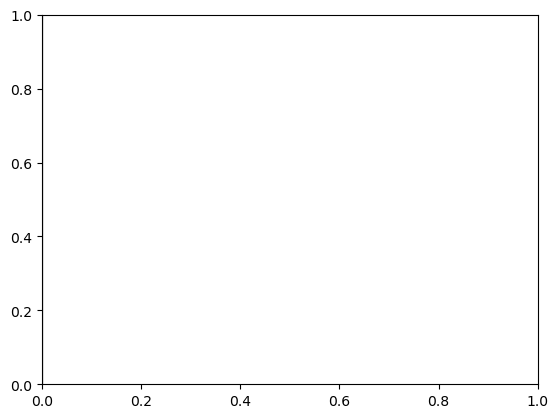

In [212]:
fig, ax = plt.subplots()

ax.axvline(0, color='tab:gray', linewidth=1)
ax.errorbar(
	x=[ a['mean'] for a in homophily.values() ], y=range(len(homophily)),
	xerr=np.array((a['std']) for a in homophily.values()),
	linestyle='', marker='.'
)
ax.set_yticks(range(len(homophily)))
ax.set_yticklabels([ key.replace('_', ' ') for key in homophily.items() ])

plt.show()